<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Various_Types_of_Moving_Averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
from datetime import datetime
import seaborn as sns



In [177]:
from google.colab import files
uploaded = files.upload()

Saving electricity_c.csv to electricity_c (8).csv


In [178]:
def new_time(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [179]:
df1 = pd.read_csv('electricity_c.csv')

In [180]:
df1.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,1/1/2016,365,1423.5,219.0,247.73,31
1,2/1/2016,292,1138.8,175.2,234.11,31
2,3/1/2016,130,507.0,78.0,123.85,29
3,4/1/2016,117,456.3,70.2,111.22,29
4,5/1/2016,136,530.4,81.6,118.37,29


In [181]:
df1.shape     

(53, 6)

In [182]:
df1.columns

Index(['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount',
       'Billing_days'],
      dtype='object')

In [183]:
df1.isnull().sum()

Bill_Date        0
On_peak          0
Off_peak         0
Usage_charge     0
Billed_amount    0
Billing_days     0
dtype: int64

In [184]:
df1.nunique()

Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64

In [185]:
df1['Bill_Date'] = pd.to_datetime(df1.Bill_Date)
print (df1)

    Bill_Date  On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
0  2016-01-01      365    1423.5        219.00         247.73            31
1  2016-02-01      292    1138.8        175.20         234.11            31
2  2016-03-01      130     507.0         78.00         123.85            29
3  2016-04-01      117     456.3         70.20         111.22            29
4  2016-05-01      136     530.4         81.60         118.37            29
5  2016-06-01       63     245.7         37.80          77.81            32
6  2016-07-01      110     429.0         66.00          86.67            30
7  2016-08-01      176     686.4        105.60         122.40            29
8  2016-09-01      357    1392.3        214.20         223.62            33
9  2016-10-01      235     916.5        141.00         152.54            29
10 2016-11-01      193     752.7        115.80         150.54            32
11 2016-12-01      344    1341.6        206.40         244.37            31
12 2017-01-0

In [186]:
df2 = df1.set_index('Bill_Date')

In [187]:
df2.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [188]:
df2_2018 = df2['2016':'2018'][['Billed_amount']]

In [189]:
df2_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


In [190]:
#simple moving average
df2_2018['Billed_amount'].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [191]:
df2_2018['ma_window_3'] = df2_2018['Billed_amount'].rolling(window=3).mean().shift(1)  

In [192]:
df2_2018

,Billed_amount,ma_window_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


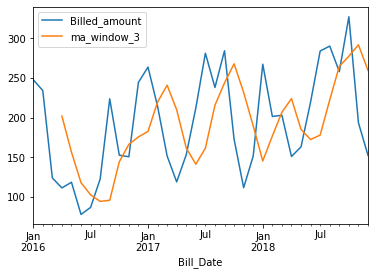

In [193]:
df2_2018.plot();

In [194]:
#weighted moving average
def wma(weights):
  def calculation(x):
    return (weights*x).mean()
  return calculation

In [195]:
df2_2018['wma_rolling_window_3'] = df2_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [196]:
df2_2018

,Billed_amount,ma_window_3,wma_rolling_window_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


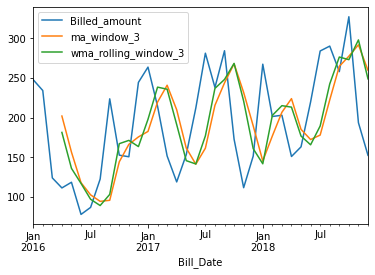

In [197]:
df2_2018.plot();

In [198]:
#exponential moving average
df2_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean()

Bill_Date
2016-01-01    247.730000
2016-02-01    240.920000
2016-03-01    182.385000
2016-04-01    146.802500
2016-05-01    132.586250
2016-06-01    105.198125
2016-07-01     95.934063
2016-08-01    109.167031
2016-09-01    166.393516
2016-10-01    159.466758
2016-11-01    155.003379
2016-12-01    199.686689
2017-01-01    231.663345
2017-02-01    222.991672
2017-03-01    187.265836
2017-04-01    153.027918
2017-05-01    153.103959
2017-06-01    182.591980
2017-07-01    231.890990
2017-08-01    234.930495
2017-09-01    259.615247
2017-10-01    216.152624
2017-11-01    163.831312
2017-12-01    157.625656
2018-01-01    212.472828
2018-02-01    206.911414
2018-03-01    204.910707
2018-04-01    177.885353
2018-05-01    170.477677
2018-06-01    195.118838
2018-07-01    239.549419
2018-08-01    264.849710
2018-09-01    261.404855
2018-10-01    294.297427
2018-11-01    243.893714
2018-12-01    198.116857
Name: Billed_amount, dtype: float64

In [199]:
df2_2018['EWM(3)'] = df2_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [200]:
df2_2018

,Billed_amount,ma_window_3,wma_rolling_window_3,EWM(3)
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,181.250000,182.385000
2016-05-01,118.37,156.393333,135.911667,146.802500
2016-06-01,77.81,117.813333,116.900000,132.586250
2016-07-01,86.67,102.466667,96.898333,105.198125
2016-08-01,122.40,94.283333,89.000000,95.934063
2016-09-01,223.62,95.626667,103.058333,109.167031


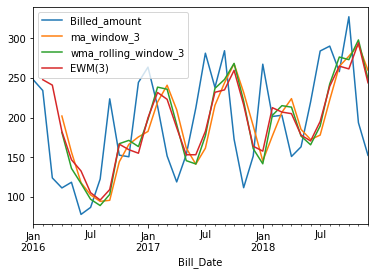

In [201]:
df2_2018.plot();

In [202]:
#exponential smoothing
df2_2018['Billed_amount'].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    158.153800
2016-04-01    125.300140
2016-05-01    120.449042
2016-06-01     90.601713
2016-07-01     87.849514
2016-08-01    112.034854
2016-09-01    190.144456
2016-10-01    163.821337
2016-11-01    154.524401
2016-12-01    217.416320
2017-01-01    249.772896
2017-02-01    224.955869
2017-03-01    173.564761
2017-04-01    135.222428
2017-05-01    147.792728
2017-06-01    192.793819
2017-07-01    254.671146
2017-08-01    242.980344
2017-09-01    271.904103
2017-10-01    202.454231
2017-11-01    138.793269
2017-12-01    147.631981
2018-01-01    231.413594
2018-02-01    210.369078
2018-03-01    205.147723
2018-04-01    167.146317
2018-05-01    164.292895
2018-06-01    203.119869
2018-07-01    259.721961
2018-08-01    281.021588
2018-09-01    264.878476
2018-10-01    308.496543
2018-11-01    227.991963
2018-12-01    175.035589
Name: Billed_amount, dtype: float64

In [203]:
df2_2018['ESM(3)'] = df2_2018['Billed_amount'].ewm(alpha=0.5, adjust=False, min_periods=3).mean().shift(1)

In [204]:
df2_2018

,Billed_amount,ma_window_3,wma_rolling_window_3,EWM(3),ESM(3)
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN
2016-04-01,111.22,201.896667,181.250000,182.385000,182.385000
2016-05-01,118.37,156.393333,135.911667,146.802500,146.802500
2016-06-01,77.81,117.813333,116.900000,132.586250,132.586250
2016-07-01,86.67,102.466667,96.898333,105.198125,105.198125
2016-08-01,122.40,94.283333,89.000000,95.934063,95.934063
2016-09-01,223.62,95.626667,103.058333,109.167031,109.167031


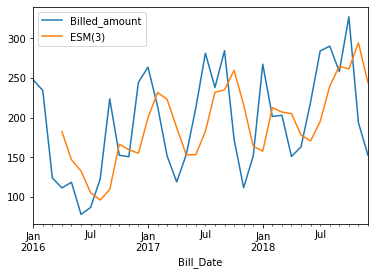

In [205]:
df2_2018[['Billed_amount','ESM(3)']].plot();

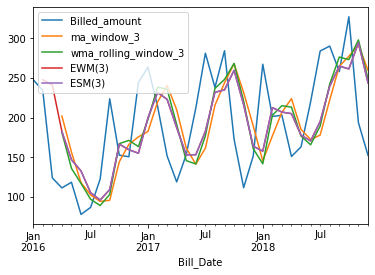

In [206]:
df2_2018.plot();

In [208]:
#RMSE values to evaluate

(((df2_2018['Billed_amount']-df2_2018['ma_window_3']))**2).mean()**0.5

70.98561687433802

In [209]:
(((df2_2018['Billed_amount']-df2_2018['wma_rolling_window_3']))**2).mean()**0.5

65.82572602256133

In [210]:
(((df2_2018['Billed_amount']-df2_2018['EWM(3)']))**2).mean()**0.5

64.32131239414655

In [211]:
(((df2_2018['Billed_amount']-df2_2018['ESM(3)']))**2).mean()**0.5

62.98441454251434